# Project 3: Part 3 Modeling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
import datetime as dt
import numpy as np
import pickle
from tqdm import tqdm

%matplotlib inline

from sklearn import metrics

import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.metrics import roc_curve, auc

In [34]:
with open("users_multiclass.pkl", 'rb') as picklefile: 
    users = pickle.load(picklefile)

In [36]:
y = users.country_destination
users = users.drop('country_destination', axis = 1)

In [39]:
y.value_counts()

US       62376
other    10094
FR        5023
IT        2835
GB        2324
ES        2249
CA        1428
DE        1061
NL         762
AU         539
PT         217
Name: country_destination, dtype: int64

In [50]:
y = y.replace('FR','EU')
y = y.replace('IT','EU')
y = y.replace('ES','EU')
y = y.replace('DE','EU')
y = y.replace('NL','EU')
y = y.replace('PT','EU')
y = y.replace('US','NA')
y = y.replace('CA','NA')
y = y.replace('GB','GB_AU')
y = y.replace('AU','GB_AU')
y.value_counts()

NA       63804
EU       12147
other    10094
GB_AU     2863
Name: country_destination, dtype: int64

In [29]:
# Separate majority and minority classes
users_majority = users[users.US==1]
users_minority = users[users.US==0]
 
# Upsample minority class
users_minority_upsampled = resample(users_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=62376,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
users_upsampled = pd.concat([users_majority, users_minority_upsampled])
 
# Display new class counts
users_upsampled.US.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

AttributeError: 'DataFrame' object has no attribute 'US'

In [23]:
y = users_upsampled['US']
users = users_upsampled.drop('US', axis = 1)

In [51]:
users = users.drop('id',axis = 1)

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(users, y, test_size=0.2,stratify = y)#, random_state = 1234)

In [26]:
#y = users['US']
#users = users.drop('US', axis = 1)

In [27]:
#users = users.drop('id',axis = 1)

In [28]:
#users.shape

In [29]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: US, dtype: uint8

In [30]:
#xtrain, xtest, ytrain, ytest = train_test_split(users.iloc[:,:], y, test_size=0.2,stratify = y)#, random_state = 1234)

In [31]:
xtrain.head()

,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_facebook,signup_method_google,signup_app_Moweb,signup_app_Web,signup_app_iOS,first_device_type_Android Tablet,first_device_type_Desktop (Other),...,langues_en,diff_account_to_first_active,diff_account_to_first_booking,age,total_sessions,total_sessions_on_mac,total_sessions_on_windows,total_sessions_on_iphone,total_sessions_on_android,no_age_entered
84475,1,0,0,0,0,0,1,0,0,0,...,1,0,5,43.0,62.0,0.0,62.0,0.0,0.0,0
15400,1,0,0,0,0,0,1,0,0,0,...,1,0,6,24.0,0.0,0.0,0.0,0.0,0.0,0
22233,0,1,0,1,0,0,1,0,0,0,...,1,0,314,49.0,0.0,0.0,0.0,0.0,0.0,0
53487,0,1,0,0,0,0,1,0,0,0,...,1,0,4,45.0,0.0,0.0,0.0,0.0,0.0,0
55509,0,1,0,0,0,0,1,0,0,0,...,0,0,1,43.0,0.0,0.0,0.0,0.0,0.0,0


## KNN

In [32]:
normalizer = preprocessing.Normalizer()
users_norm = normalizer.fit_transform(users)

In [33]:
xtrain_norm, xtest_norm, ytrain_norm, ytest_norm = train_test_split(users_norm, y, test_size=0.2,stratify = y)#, random_state = 1234)

In [34]:
k_range = list(range(1,31))
k_auc = []
for k in tqdm(k_range):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain_norm, ytrain_norm)
    y_score = knn.predict_proba(xtest_norm)[:,1]
    fpr, tpr,_ = roc_curve(ytest_norm, y_score)
    roc_auc = auc(fpr, tpr)
    k_auc.append(roc_auc)
print(k_auc)


  0%|          | 0/30 [00:00<?, ?it/s]
Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Users/emilygeller/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/emilygeller/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/emilygeller/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 30/30 [16:03<00:00, 32.13s/it]

[0.74422206709025618, 0.74174617269164811, 0.71959078785978492, 0.69772629259802077, 0.6777704398858635, 0.66439985453433315, 0.65491468027430311, 0.64781595573320416, 0.64085946500246405, 0.63729905466592052, 0.63141457650793731, 0.62745502225997352, 0.62413698830813269, 0.62088747228345764, 0.61828349228113166, 0.61578586477218633, 0.61229103927637252, 0.60951033840685542, 0.60787111574865027, 0.60534336386784482, 0.60336487016996476, 0.60227124977752877, 0.60111689232906351, 0.60053285795701694, 0.59969402093703272, 0.59942042790293626, 0.59926070801429732, 0.59790444627632955, 0.59769879932998415, 0.59758640397177809]


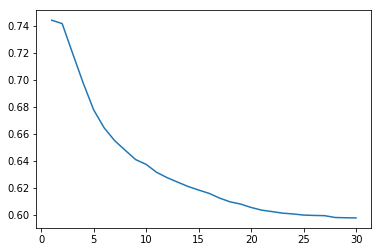

In [35]:
plt.plot(k_range, k_auc)
plt.savefig('knn_k_auc')

In [36]:
np.argmax(np.array(k_auc))

0

In [37]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(xtrain_norm, ytrain_norm)
y_pred = knn.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, knn.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, knn.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,knn.predict(xtest_norm)))

Accuracy: 0.581
             precision    recall  f1-score   support

          0       0.57      0.70      0.62     12475
          1       0.61      0.47      0.53     12476

avg / total       0.59      0.58      0.58     24951

[[8689 3786]
 [6667 5809]]


In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(xtrain_norm, ytrain_norm)
y_pred = knn5.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, knn5.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, knn5.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,knn5.predict(xtest_norm)))

Accuracy: 0.628
             precision    recall  f1-score   support

          0       0.61      0.70      0.65     12475
          1       0.65      0.56      0.60     12476

avg / total       0.63      0.63      0.63     24951

[[8719 3756]
 [5514 6962]]


## SVMs

### Linear

In [ ]:
l_svm = SVC(kernel='linear')
l_svm.fit(xtrain_norm, ytrain_norm)
y_pred = l_svm.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, l_svm.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, l_svm.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,l_svm.predict(xtest_norm)))

### RBF

In [ ]:
rbf_svm = SVC(kernel='rbf', gamma = 0.001)
rbf_svm.fit(xtrain_norm, ytrain_norm)
y_pred = svm.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, rbf_svm.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, rbf_svm.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,rbf_svm.predict(xtest_norm)))

## Logistic Regression

In [ ]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(xtrain, ytrain)
y_pred = lr.predict(xtest)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, lr.predict(xtest)))
print(metrics.classification_report(ytest, lr.predict(xtest)))
print(metrics.confusion_matrix(ytest,lr.predict(xtest)))
# Needs work: print(cross_val_score(lr, xtest, ytest, cv=10, scoring='f1'))

## Random Forests

### Random Forests with Upsampling

In [53]:
rf = RandomForestClassifier(n_estimators = 5)#class_weight = 'balanced')
rf.fit(xtrain_up, ytrain_up)
y_pred = rf.predict(xtest_up)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_up, rf.predict(xtest_up)))
print(metrics.classification_report(ytest_up, rf.predict(xtest_up)))
print(metrics.confusion_matrix(ytest_up,rf.predict(xtest_up)))

NameError: name 'xtrain_up' is not defined

In [ ]:
n_range = list(range(10,100))
n_up_auc = []
for n in tqdm(n_range):
    rf = RandomForestClassifier(n_estimators = n)#class_weight = 'balanced')
    rf.fit(xtrain_up, ytrain_up)
    y_score = rf.predict_proba(xtest_up)[:,1]
    fpr, tpr,_ = roc_curve(ytest_up, y_score)
    roc_auc = auc(fpr, tpr)
    n_up_auc.append(roc_auc)
print(n_up_auc)

In [ ]:
plt.plot(n_range, n_up_auc)
plt.savefig('n_up_auc')

In [ ]:
np.argmax(np.array(n_up_auc))

In [ ]:
rf_64 = RandomForestClassifier(n_estimators = 64)#class_weight = 'balanced')
rf_64.fit(xtrain_up, ytrain_up)
y_pred = rf.predict(xtest_up)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_up, rf_64.predict(xtest_up)))
print(metrics.classification_report(ytest_up, rf_64.predict(xtest_up)))
print(metrics.confusion_matrix(ytest_up,rf_64.predict(xtest_up)))

### Random Forests, no upsampling

In [54]:
rf = RandomForestClassifier(n_estimators = 5)#class_weight = 'balanced')
rf.fit(xtrain, ytrain)
y_pred = rf.predict(xtest)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, rf.predict(xtest)))
print(metrics.classification_report(ytest, rf.predict(xtest)))
print(metrics.confusion_matrix(ytest,rf.predict(xtest)))

Accuracy: 0.632
             precision    recall  f1-score   support

         EU       0.17      0.12      0.14      2429
      GB_AU       0.04      0.02      0.02       573
         NA       0.73      0.85      0.78     12761
      other       0.15      0.06      0.08      2019

avg / total       0.56      0.63      0.59     17782

[[  292    42  1976   119]
 [   71    11   464    27]
 [ 1180   221 10810   550]
 [  209    40  1651   119]]


In [ ]:
n_range = list(range(10,100))
n_auc = []
for n in tqdm(n_range):
    rf = RandomForestClassifier(n_estimators = n)#class_weight = 'balanced')
    rf.fit(xtrain, ytrain)
    y_score = rf.predict_proba(xtest)[:,1]
    fpr, tpr,_ = roc_curve(ytest, y_score)
    roc_auc = auc(fpr, tpr)
    n_auc.append(roc_auc)
print(n_auc)

In [ ]:
plt.plot(n_range, n_auc)
plt.savefig('rf_n_auc')

In [ ]:
np.argmax(np.array(n_auc))

In [ ]:
rf_plain = RandomForestClassifier(n_estimators = 48, class_weight = 'balanced')
rf_plain.fit(xtrain, ytrain)
y_pred = rf_plain.predict(xtest)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, rf_plain.predict(xtest)))
print(metrics.classification_report(ytest, rf_plain.predict(xtest)))
print(metrics.confusion_matrix(ytest,rf_plain.predict(xtest)))

In [ ]:
features = pd.DataFrame()
features['importances'] = rf.feature_importances_
features['features'] = users.columns
features.sort_values('importances',ascending = False)

## Naive Bayes

### Gaussian

In [ ]:
nb_g = naive_bayes.GaussianNB()
nb_g.fit(xtrain, ytrain)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, nb_g.predict(xtest)))
print(metrics.classification_report(ytest, nb_g.predict(xtest)))
print(metrics.confusion_matrix(ytest,nb_g.predict(xtest)))

### Bernoulli

In [ ]:
nb_b = naive_bayes.BernoulliNB()
nb_b.fit(xtrain, ytrain)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, nb_b.predict(xtest)))
print(metrics.classification_report(ytest, nb_b.predict(xtest)))
print(metrics.confusion_matrix(ytest,nb_b.predict(xtest)))

### Multinomial

In [ ]:
nb_m = naive_bayes.MultinomialNB()
nb_m.fit(xtrain, ytrain)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, nb_m.predict(xtest)))
print(metrics.classification_report(ytest, nb_m.predict(xtest)))
print(metrics.confusion_matrix(ytest,nb_m.predict(xtest)))

In [ ]:
users

In [ ]:
# What about ROC ? 

from sklearn.metrics import roc_curve, auc

xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(users, y, test_size=0.2, stratify = y, random_state=1234)

lr_score=lr.predict_proba(xtest)[:,1]
nb_m_score = nb_m.predict_proba(xtest)[:,1]
nb_b_score = nb_b.predict_proba(xtest)[:,1]
rf_64_score = rf_64.predict_proba(xtest_up)[:,1]
rf_plain_score = rf_plain.predict_proba(xtest)[:,1]
knn_score = knn.predict_proba(xtest)[:,1]
knn5_score = knn5.predict_proba(xtest)[:,1]
#l_svm_score = l_svm.predict_proba(xtest)[:,1]

lr_fpr, lr_tpr,_ = roc_curve(ytest, lr_score)
nb_m_fpr, nb_m_tpr,_ = roc_curve(ytest, nb_m_score)
nb_b_fpr, nb_b_tpr,_ = roc_curve(ytest, nb_b_score)
rf_64_fpr, rf_64_tpr,_ = roc_curve(ytest_up, rf_64_score)
rf_plain_fpr, rf_plain_tpr,_ = roc_curve(ytest, rf_plain_score)
knn_fpr, knn_tpr,_ = roc_curve(ytest, knn_score)
knn5_fpr, knn5_tpr,_ = roc_curve(ytest, knn5_score)
#l_svm_fpr, l_svm_tpr,_ = roc_curve(ytest, l_svm_score)
#roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10,10))
plt.subplot(1,1,1)
# Plotting our Baseline..
plt.plot([0,1],[0,1])

plt.plot(lr_fpr,lr_tpr, label = 'LogisticRegression')
plt.plot(nb_m_fpr,nb_m_tpr, label = 'NaiveBayes - Multinomial')
plt.plot(nb_b_fpr,nb_b_tpr, label = 'NaiveBayes - Bernoulli')
plt.plot(rf_64_fpr,rf_64_tpr, label = 'RandomForrests n=64, upsampled')
plt.plot(rf_plain_fpr,rf_plain_tpr, label = 'RandomForrests n=48')
plt.plot(knn_fpr,knn_tpr, label = 'KNN K = 16')
plt.plot(knn5_fpr,knn5_tpr, label = 'KNN K=5')
#plt.plot(l_svm_fpr,l_svm_tpr, label = 'SVM-Linear')

plt.legend()
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.savefig('RocCurve')